<a href="https://colab.research.google.com/github/Yasmcor/Projetos_Python/blob/gh-pages/Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IMPORTANDO BIBLIOTECAS

import numpy as np # Manipulação dos dados
import matplotlib.pyplot as plt # Vizualização dos dados
import sklearn as sk # Machine learning
import scipy
import IPython.display # Execução de áudio
from sklearn.cluster import KMeans

In [4]:
import io
from scipy.io import wavfile
# Lendo o arquivo usando scipy
sample_rate, recording = wavfile.read('/content/audio.wav')
sample_rate, recording = wavfile.read('/content/audio.wav')

In [5]:
# Abrindo o arquivo
IPython.display.Audio('/content/audio.wav')

Text(0.5, 0, 'Tempo')

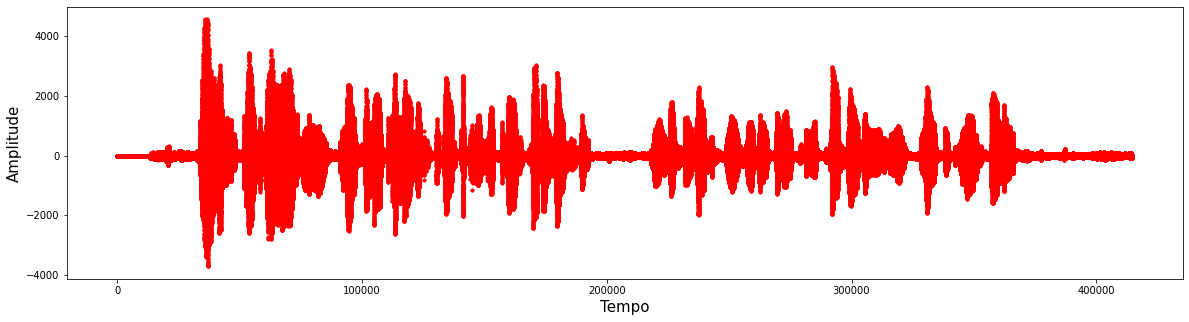

In [6]:
# Vizualizando a onda sonora
fig = plt.figure(figsize= (20,5))
axl = fig.add_subplot()
axl.scatter(y = recording, x = np.arange(0, len(recording)), s = 10, c = 'r',marker = 'o', label = 'Audio Original')
axl.set_ylabel('Amplitude', size = 15 )
axl.set_xlabel('Tempo', size = 15)


In [7]:
# Formatando recording para entrada do modelo
features = recording.reshape(-1,1)
features.shape

(414616, 1)

In [8]:
# Executando K-Means
kmeans = KMeans(n_clusters= 8) # Instanciando o modelo
kmeans.fit_transform(features) # Transforma o exemplos calculando a distania ate os clusters
predict = kmeans.predict(features) # Coloca a label do cluster mais próximo

In [9]:
np.unique(predict)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [10]:
# Vizualizando centróides 
kmeans.cluster_centers_

array([[  278.87401897],
       [-1721.24672021],
       [   -6.54156326],
       [ 1347.77906531],
       [ -888.74529787],
       [ 2348.59986902],
       [ -371.38919472],
       [  728.33201197]])

In [11]:
# transformando valores dos centróides e excutando o áudio
from scipy.io.wavfile import write
write('saída_teste.wav', sample_rate, kmeans.cluster_centers_[predict].astype(np.int16))

In [12]:
IPython.display.Audio('saída_teste.wav')

Text(0.5, 0, 'Tempo')

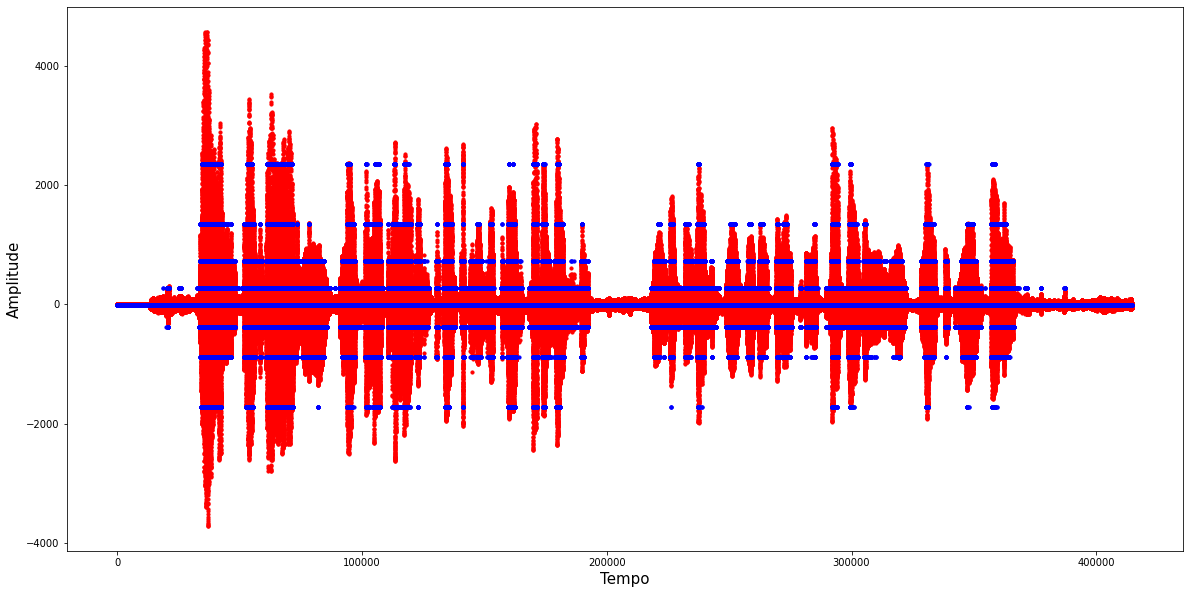

In [13]:
# Comparando áudio original com o clusterizado
fig = plt.figure(figsize=(20, 10))
axl = fig.add_subplot()

axl.scatter(y = recording, x = np.arange(0, len(recording)), s = 10, c = 'r', marker = 'o', label = 'Audio Original')
axl.scatter(y = kmeans.cluster_centers_[predict].astype(np.int16), x = np.arange(0, len(recording)), s = 10, c = 'b', marker = 'o', label = 'Audio')

axl.set_ylabel('Amplitude', size = 15 )
axl.set_xlabel('Tempo', size = 15)
